### Universidad Politécnica de Yucatán
#### Social Network Analysis

Professor: Ing. Dider Gamboa

Student : Walter Roberto Vives Castro

DATA 8A


In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from operator import itemgetter

In [2]:
# Load graph
facebook = "socfb-Northwestern25.edgelist"

# Read graph
G_facebook = nx.read_edgelist(facebook, create_using = nx.Graph(), nodetype = int)

# NB4. Information Cascades
## 1. Facebook Network

The ```socfb-Northwestern25``` (socfb-Northwestern25.edges.gz) is a snapshot of Northwestern University’s Facebook network. The nodes are anonymous users and the links are friend relationships. Load this network into a NetworkX graph in order to answer the following questions. Be sure to use the proper graph class for an undirected, unweighted network.
1. What proportion of nodes have degree 100 or greater?

In [3]:
proportion = (len([x for x in list(G_facebook.degree()) if x[1] >= 100]) * 100)/G_facebook.number_of_nodes()
print("Proportion: {}".format(round(proportion, 2)))

Proportion: 38.21


2. What is the maximum degree for nodes in this network?

In [4]:
max_degree = max(list(G_facebook.degree()), key = lambda x: x[1])
print("The maximum degree is: {}".format(max_degree[1]))

The maximum degree is: 2105


3. Users in this network are anonymized by giving the nodes numerical names. Which node hast the highest degree?

In [5]:
highest_degree_user = max_degree[0]
print("Node with Highest Degree: {}".format(highest_degree_user))

Node with Highest Degree: 8262


4. What is the 95th percentile for degree, i.e. the value such that 95% of nodes have this degree or less?

In [6]:
percentile_95 = np.percentile([x[1] for x in G_facebook.degree()], 95)
percentile_95

244.0

The 95% of the users in this network has 244 of less friends.

5. What is the mean degree for nodes in this network? Round to the nearest integer.

In [7]:
print("The mean degree of the nodes in this network is: {}".format(round(np.mean([x[1] for x in G_facebook.degree()]))))

The mean degree of the nodes in this network is: 92


6. Which of the following shapes best describes the degree distribution in this network? You can obtain the answer visually using histograms.

a. Uniform: node degrees are evenly distributed between the
minimum and maximum.

b. Normal: most node degrees are near the mean, dropping off rapidly in both directions.

c. Right-tailed: most node degrees are relatively small compared to the range of degrees.

d. Left-tailed: most node degrees are relatively large compared to the range of degrees.

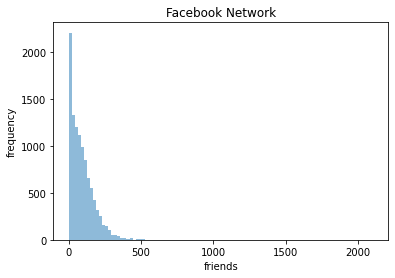

In [8]:
plt.hist([G_facebook.degree(x) for x in G_facebook.nodes()], bins = 100, alpha = 0.5)
plt.title("Facebook Network")
plt.xlabel("friends")
plt.ylabel("frequency")
plt.show()

c. Right-tailed.


The distribution of the data has a positive skewess.

Once you measure the number of nodes and links, use ```nx.gnm_random_graph()```to create a separate random network with the same number of nodes and links as the Facebook graph. Use this random network to answer the following questions.

7. What is the 95th percentile for degree in the random network, i.e. the value such that 95% of nodes have this degree or less?

In [9]:
G_random = nx.gnm_random_graph(G_facebook.number_of_nodes(), G_facebook.number_of_edges())
percentile_95_random = np.percentile([x[1] for x in G_random.degree()], 95)
percentile_95_random

108.0

The 95% of the users in this network has 108 links.

8. Which of the following shapes best describes the degree distribution in this random network? You can obtain the answer visually using histograms.

a. Uniform: node degrees are evenly distributed between the
minimum and maximum.

b. Normal: most node degrees are near the mean, dropping off rapidly in both directions.

c. Right-tailed: most node degrees are relatively small compared to the range of degrees.

d. Left-tailed: most node degrees are relatively large compared to the range of degrees. 

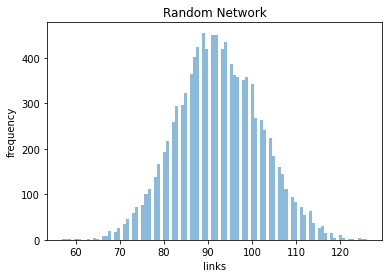

In [10]:
plt.hist([G_random.degree(x) for x in G_random.nodes()], bins = 100, alpha = 0.5)
plt.title("Random Network")
plt.xlabel("links")
plt.ylabel("frequency")
plt.show()

b. Normal: most node degrees are near the mean, dropping off rapidly in both directions.

9. Estimate the average shortest-path length in this random network using a random sample of 1000 pairs of nodes.

In [11]:
paths = []
for _ in range(1000):
    pair = random.sample(list(G_random.nodes()), 2)
    path = nx.shortest_path_length(G = G_random, source = pair[0], target = pair[1])
    paths.append(path)
print("Average Shortest-Path length estimation: {}".format(np.mean(paths)))

Average Shortest-Path length estimation: 2.406


10. What is the average clustering coefficient of this random network? Answer to at least two decimal places.

In [12]:
print("Average Clustering Coefficient: {}".format(nx.average_clustering(G_random)))

Average Clustering Coefficient: 0.008757083356990809


## 2. OpenFlights
Load the OpenFlights US flight (openflights_usa.edges.gz) network into a Network graph to answer the following questions.

In [13]:
flights = "openflights_usa.edges"
G_us = nx.read_edgelist(flights, create_using = nx.DiGraph(), nodetype = str)

1. What is the average number of routes served by each airport in this network?

In [14]:
avg_degree = sum([G_us.degree(x) for x in G_us.nodes()])/G_us.number_of_nodes()
print("The average number of rutes by each airport is: {}".format(avg_degree))

The average number of rutes by each airport is: 10.186813186813186


2. What are the top five airport in terms of number of routes?

In [15]:
max_rutes = sorted(list(G_us.degree()), key = lambda x: x[1], reverse = True)[:5]
for i in range(len(max_rutes)):
    print("{}. Airport: {}, total rutes: {}".format(i+1, max_rutes[i][0], max_rutes[i][1]))

1. Airport: ATL, total rutes: 153
2. Airport: ORD, total rutes: 149
3. Airport: DEN, total rutes: 148
4. Airport: DFW, total rutes: 138
5. Airport: MSP, total rutes: 117


3. How many airports in this network serve only a single route?

In [16]:
single_route = sum([G_us.degree(x) for x in G_us.nodes() if G_us.degree(x) == 1])
print("There are {} airports with a single route".format(single_route))

There are 156 airports with a single route


4. Which airport has the highest closeness centrality?

In [17]:
closeness = sorted(list(nx.closeness_centrality(G_us).items()), key = lambda x: x[1], reverse = True)[0]
print("Airport: {}, Closeness Centrality: {}.".format(closeness[0], closeness[1]))

Airport: MSP, Closeness Centrality: 0.27937698398855826.


5. Which airport has the highest betweeness centrality?

In [18]:
betweenness_centrality = sorted(list(nx.betweenness_centrality(G_us).items()), key = lambda x: x[1], reverse = True)[0]
print("Airport: {}, betweenness centrality: {}.".format(betweenness_centrality[0], betweenness_centrality[1]))

Airport: DEN, betweenness centrality: 0.024690346935470113.


## 3. Zachary's Karate Club

1. Find the best bisection of Zachary’s karate club network by applying the Kernighan–Lin algorithm. You can use the ```kernighan_lin_bisection()``` function of NetworkX. Compare the resulting bipartition with the natural partition of the network and expose similarities and differences.

In [19]:
G_k = nx.karate_club_graph()
print(nx.info(G_k))

Name: Zachary's Karate Club
Type: Graph
Number of nodes: 34
Number of edges: 78
Average degree:   4.5882


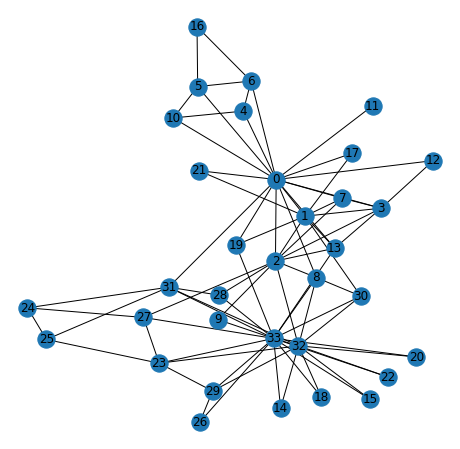

In [20]:
plt.figure(figsize = (8,8))
plt.axis("off")
nx.draw(G_k, with_labels = True)

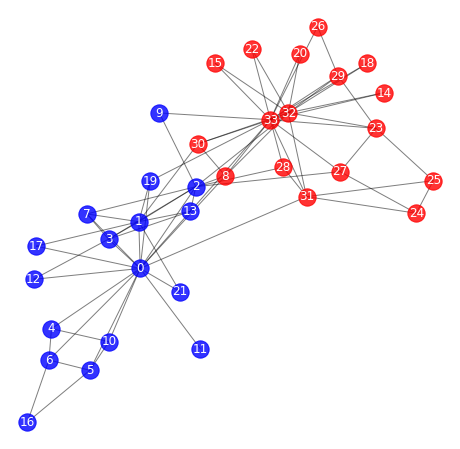

In [21]:
bisections = nx.algorithms.community.kernighan_lin_bisection(G_k)
a = list(bisections[0])
b = list(bisections[1])

# Position of the nodes
pos = nx.fruchterman_reingold_layout(G_k)

# Plot bisections
plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(G_k,pos,
                       nodelist=a,
                       node_color='r',
                       node_size=300,
                   alpha=0.8)

nx.draw_networkx_nodes(G_k,pos,
                       nodelist=b,
                       node_color='b',
                       node_size=300,
                   alpha=0.8)

nx.draw_networkx_edges(G_k, pos, alpha=0.5)
nx.draw_networkx_labels(G_k, pos, font_color="white")
plt.axis("off")

plt.show()

It can be noticed that there are 3 hubs present in the network. The network present a clearly bipartition

2. Apply the Girvan–Newman algorithm using the ```community.girvan_newman()``` function of NetworkX. Verify that the partition $P_{GN}$ in five clusters is the one with highest modularity.

In [22]:
# Girvan–Newman algorithm using the community.girvan_newman() function of NetworkX
list_communities = list(nx.algorithms.community.girvan_newman(G_k))

In [23]:
# format list of lists
communitites_final = []
for element in list_communities:
    list_set = list(element)
    list_list =[list(c) for c in list_set]
    communitites_final.append(list_list)

In [24]:
# Modularity of each cluster
list_clusters = [] 
list_modularity = []
highest_modularity = []

for i in range(len(communitites_final)):
    cluster_modularity = nx.algorithms.community.modularity(G_k, communitites_final[i]) 
    clusters = len(communitites_final[i])
    list_modularity.append(cluster_modularity)
    list_clusters.append(clusters)
    
    # Community and modularity
    highest_modularity.append((communitites_final[i], cluster_modularity))


max_mod = max(highest_modularity, key = itemgetter(1))
max_modularity = max_mod[1]
max_community = max_mod[0]

print("Maximum Modularity: {}\n".format(max_modularity))
print("Communities:\n {}".format(max_community))

Maximum Modularity: 0.40129848783694944

Communities:
 [[0, 1, 3, 7, 11, 12, 13, 17, 19, 21], [2, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16], [32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30], [9]]


In [25]:
# Moduarity of all communites
data = zip(list_clusters,list_modularity)
columns = ["Cluster", "Modularity"]
df = pd.DataFrame(data = data, columns = columns)

def highlight_max(s):

    is_max = s == s.max()
    return ['font-weight: bold' if x else '' for x in is_max]

df_style = df.style.apply(highlight_max)
df_style

,Cluster,Modularity
0,2,0.359961
1,3,0.348784
2,4,0.363248
3,5,0.401298
4,6,0.392505
5,7,0.376233
6,8,0.358317
7,9,0.341716
8,10,0.324786
9,11,0.315911


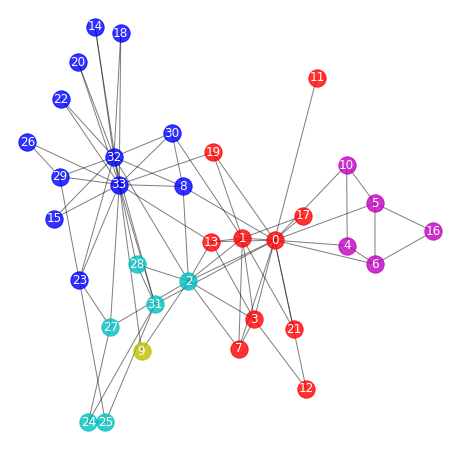

In [26]:
#### Plot Communities ####

# 5 communities
a,b,c,d,e = max_community[0],max_community[1],max_community[2],max_community[3],max_community[4]

# Position of the nodes
pos = nx.fruchterman_reingold_layout(G_k)

# Settings
plt.figure(figsize=(8,8))

# Plot a
nx.draw_networkx_nodes(G_k,pos,
                       nodelist=a,
                       node_color='r',
                       node_size=300,
                   alpha=0.8)

# Plot b
nx.draw_networkx_nodes(G_k,pos,
                       nodelist=b,
                       node_color='c',
                       node_size=300,
                   alpha=0.8)

# Plot c
nx.draw_networkx_nodes(G_k,pos,
                       nodelist=c,
                       node_color='m',
                       node_size=300,
                   alpha=0.8)

# Plot d
nx.draw_networkx_nodes(G_k,pos,
                       nodelist=d,
                       node_color='b',
                       node_size=300,
                   alpha=0.8)

# Plot e
nx.draw_networkx_nodes(G_k,pos,
                       nodelist=e,
                       node_color='y',
                       node_size=300,
                   alpha=0.8)

nx.draw_networkx_edges(G_k, pos, alpha=0.5)
nx.draw_networkx_labels(G_k, pos, font_color="white")
plt.axis("off")

plt.show()

3. The modularity maximization algorithm, proposed by Newman, iteratively joins pairs of communities if the move increases the partition's modularity. Read about the Greedy Modularity Algorithm to find communities ([link](http://networksciencebook.com/chapter/9#modularity)).

Write the general outline in the following space.

The algorithm iteratively joins pairs of communities if the move increases the partition's modularity.

1. Assign each node to a community of its own, starting with N communities of single nodes.
2. Inspect each community pair connected by at least one link and compute the modularity difference ΔM obtained if we merge them. Identify the community pair for which ΔM is the largest and merge them. Note that modularity is always calculated for the full network.
3. Repeat Step 2 until all nodes merge into a single community, recording M for each step.
4.  Select the partition for which M is maximal.

4. Apply the NetworkX function for greedy modularity optimization ```community.greedy_modularity_communities()```. 
How many communities are there in the resulting partition $P_G$? Which partition has higher modularity, $P_{NG}$  or $P_G$? 

In [27]:
greedy_communities = nx.community.greedy_modularity_communities(G_k)
greedy_modularity = nx.algorithms.community.modularity(G_k, greedy_communities) 
print("P_G Total Communities: {}".format(len(greedy_communities)))
print("P_G Modularity: {}".format(greedy_modularity))
print("P_NG Modularity: {}".format(max_modularity))

P_G Total Communities: 3
P_G Modularity: 0.3806706114398422
P_NG Modularity: 0.40129848783694944


The partition $P_{NG}$ has higher modularity 

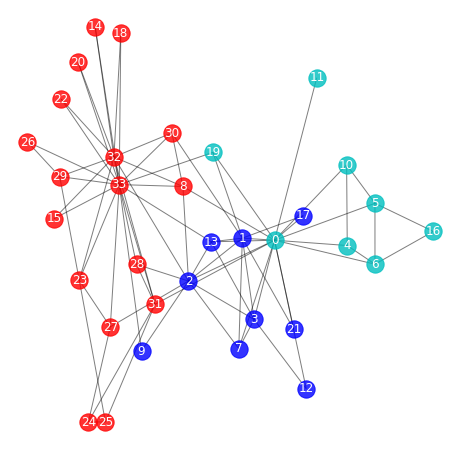

In [28]:
###### Greedy Communities ###### 

# Settings
plt.figure(figsize=(8,8))

# Plot e
nx.draw_networkx_nodes(G_k,pos,
                       nodelist=greedy_communities[0],
                       node_color='r',
                       node_size=300,
                   alpha=0.8)

# Plot e
nx.draw_networkx_nodes(G_k,pos,
                       nodelist=greedy_communities[1],
                       node_color='b',
                       node_size=300,
                   alpha=0.8)

# Plot e
nx.draw_networkx_nodes(G_k,pos,
                       nodelist=greedy_communities[2],
                       node_color='c',
                       node_size=300,
                   alpha=0.8)

nx.draw_networkx_edges(G_k, pos, alpha=0.5)
nx.draw_networkx_labels(G_k, pos, font_color="white")
plt.axis("off")

plt.show()

----

-----

----